<a href="https://colab.research.google.com/github/Sayantan-iitkgp/Amazon-UI-Clone/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Common Part

In [51]:
import heapq

def best_first_search(start, is_goal, get_neighbors, heuristic):
    pq = []
    heapq.heappush(pq, (heuristic(start), start))
    visited = set()
    parent = {start: None}

    while pq:
        _, state = heapq.heappop(pq)

        if is_goal(state):
            return parent, state

        if state in visited:
            continue
        visited.add(state)

        for nxt in get_neighbors(state):
            if nxt not in visited:
                parent[nxt] = state
                heapq.heappush(pq, (heuristic(nxt), nxt))

    return None, None


a- Man & Wolf Problem

In [52]:
from heapq import heappush, heappop

def is_valid(state):
    M, W, G, C = state
    if W == G and M != W:
        return False
    if G == C and M != G:
        return False
    return True

def neighbors(state):
    M, W, G, C = state
    res = []
    for i in range(4):
        if i == 0 or state[i] == M:
            new = list(state)
            new[0] ^= 1
            if i != 0:
                new[i] ^= 1
            new = tuple(new)
            if is_valid(new):
                res.append(new)
    return res

def heuristic(state):
    return sum(state)  # how many on right side

start = (0, 0, 0, 0)
goal = (1, 1, 1, 1)

parent, end = best_first_search(
    start,
    lambda s: s == goal,
    neighbors,
    heuristic
)

# Print path
path = []
while end:
    path.append(end)
    end = parent[end]
print(path[::-1])


[(0, 0, 0, 0), (1, 0, 1, 0), (0, 0, 1, 0), (1, 0, 1, 1), (0, 0, 0, 1), (1, 1, 0, 1), (0, 1, 0, 1), (1, 1, 1, 1)]


(b) 8-Puzzle and 15-Puzzle

Heuristic (Manhattan Distance)

In [53]:
def manhattan(state, n):
    dist = 0
    for i, val in enumerate(state):
        if val == 0:
            continue
        goal_row = (val - 1) // n
        goal_col = (val - 1) % n
        row = i // n
        col = i % n
        dist += abs(row - goal_row) + abs(col - goal_col)
    return dist


Neighbours

In [54]:
def puzzle_neighbors(state, n):
    res = []
    idx = state.index(0)
    r, c = idx // n, idx % n
    moves = [(-1,0),(1,0),(0,-1),(0,1)]

    for dr, dc in moves:
        nr, nc = r + dr, c + dc
        if 0 <= nr < n and 0 <= nc < n:
            new = list(state)
            ni = nr*n + nc
            new[idx], new[ni] = new[ni], new[idx]
            res.append(tuple(new))
    return res


Run for 8-Puzzle

In [55]:
start = (1,2,3,4,5,7,8,0,6)
goal  = (1,2,3,4,5,6,7,8,0)

parent, end = best_first_search(
    start,
    lambda s: s == goal,
    lambda s: puzzle_neighbors(s, 3),
    lambda s: manhattan(s, 3)
)

path = []
while end:
    path.append(end)
    end = parent[end]
print(len(path)-1, "moves")


11 moves


Run for 15-Puzzle

In [56]:
start = (1,2,3,4,0,6,7,5,8,9,10,11,12,13,14,15)
goal  = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,0)

parent, end = best_first_search(
    start,
    lambda s: s == goal,
    lambda s: puzzle_neighbors(s, 4),
    lambda s: manhattan(s, 4)
)

path = []
while end:
    path.append(end)
    end = parent[end]
print(len(path)-1, "moves")

173 moves


(c) 8-Queens Problem

Heuristics

In [57]:
def attacks(state):
    h = 0
    for i in range(len(state)):
        for j in range(i+1, len(state)):
            if state[i] == state[j] or abs(state[i]-state[j]) == j-i:
                h += 1
    return h


Neighbours

In [58]:
def queen_neighbors(state):
    if len(state) == 8:
        return []
    res = []
    for col in range(8):
        res.append(state + (col,))
    return res


Solve

In [59]:
start = ()
parent, end = best_first_search(
    start,
    lambda s: len(s) == 8 and attacks(s) == 0,
    queen_neighbors,
    attacks
)

print("Solution:", end)

Solution: (0, 4, 7, 5, 2, 6, 1, 3)


d) Obtaining 5 from 4 using only factorial, square root, and floor functions

Heuristics

In [60]:
import math

def neighbors(x):
    res = set()
    if x >= 0 and x <= 6 and int(x) == x:
        res.add(math.factorial(int(x)))
    if x >= 0:
        res.add(math.sqrt(x))
    res.add(math.floor(x))
    return res

def heuristic(x):
    return abs(x - 5)


Solve

In [61]:
start = 4

parent, end = best_first_search(
    start,
    lambda x: abs(x - 5) < 1e-6,
    neighbors,
    heuristic
)

path = []
while end is not None:
    path.append(end)
    end = parent[end]
print(path[::-1])


[]


Problem 2

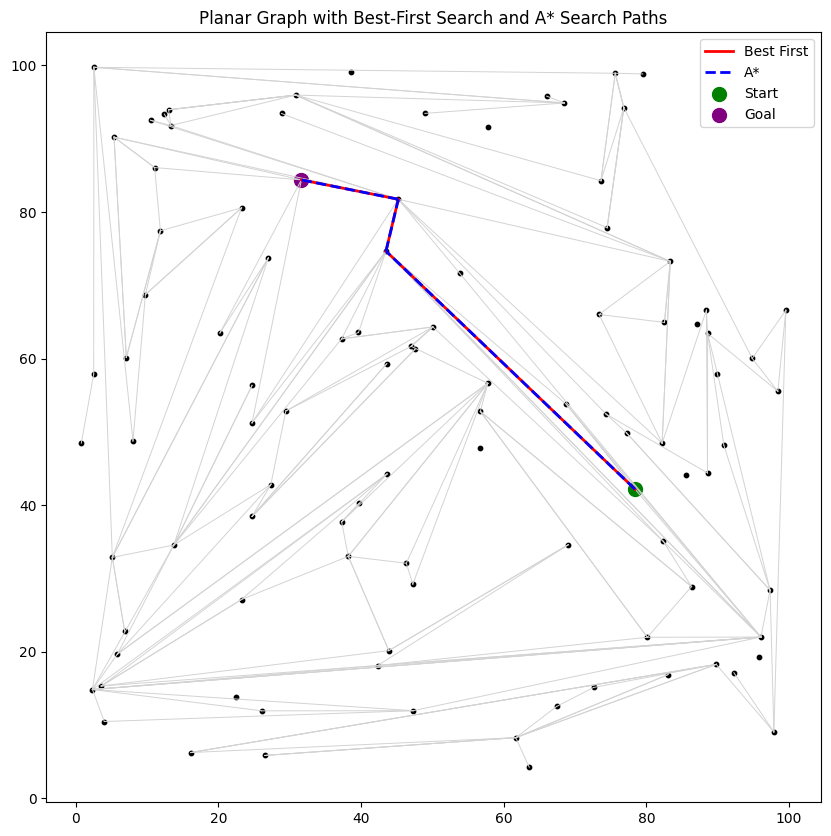

In [62]:
import random
import math
import heapq
import matplotlib.pyplot as plt

# -------------------------------
# Geometry helpers
# -------------------------------
def distance(p, q):
    return math.hypot(p[0] - q[0], p[1] - q[1])

def ccw(A, B, C):
    return (C[1]-A[1])*(B[0]-A[0]) > (B[1]-A[1])*(C[0]-A[0])

def segments_intersect(A, B, C, D):
    return ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D)

# -------------------------------
# Generate planar graph
# -------------------------------
def generate_planar_graph(n_points=100, n_edges=200):
    points = [(random.random()*100, random.random()*100) for _ in range(n_points)]
    edges = []

    attempts = 0
    while len(edges) < n_edges and attempts < 10000:
        i, j = random.sample(range(n_points), 2)
        A, B = points[i], points[j]

        valid = True
        for (u, v) in edges:
            C, D = points[u], points[v]
            if len({i, j, u, v}) == 4 and segments_intersect(A, B, C, D):
                valid = False
                break

        if valid:
            edges.append((i, j))
        attempts += 1

    graph = {i: {} for i in range(n_points)}
    for u, v in edges:
        w = distance(points[u], points[v])
        graph[u][v] = w
        graph[v][u] = w

    return points, graph, edges

# -------------------------------
# Best First Search
# -------------------------------
def best_first_search(graph, start, goal, points):
    pq = []
    heapq.heappush(pq, (distance(points[start], points[goal]), start))
    parent = {start: None}
    visited = set()

    while pq:
        _, u = heapq.heappop(pq)
        if u == goal:
            break
        if u in visited:
            continue
        visited.add(u)

        for v in graph[u]:
            if v not in visited:
                parent[v] = u
                h = distance(points[v], points[goal])
                heapq.heappush(pq, (h, v))

    return reconstruct_path(parent, goal)

# -------------------------------
# A* Search
# -------------------------------
def a_star_search(graph, start, goal, points):
    pq = []
    heapq.heappush(pq, (0, start))
    parent = {start: None}
    g_cost = {start: 0}

    while pq:
        _, u = heapq.heappop(pq)
        if u == goal:
            break

        for v in graph[u]:
            new_g = g_cost[u] + graph[u][v]
            if v not in g_cost or new_g < g_cost[v]:
                g_cost[v] = new_g
                f = new_g + distance(points[v], points[goal])
                parent[v] = u
                heapq.heappush(pq, (f, v))

    return reconstruct_path(parent, goal)

def reconstruct_path(parent, goal):
    path = []
    while goal is not None:
        path.append(goal)
        goal = parent.get(goal)
    return path[::-1]

# -------------------------------
# Visualization
# -------------------------------
def plot_graph(points, edges, path1, path2, start, goal):
    plt.figure(figsize=(10,10))

    # draw edges
    for u, v in edges:
        x = [points[u][0], points[v][0]]
        y = [points[u][1], points[v][1]]
        plt.plot(x, y, color="lightgray", linewidth=0.7)

    # draw nodes
    xs, ys = zip(*points)
    plt.scatter(xs, ys, color="black", s=10)

    # best-first path
    for i in range(len(path1)-1):
        u, v = path1[i], path1[i+1]
        plt.plot([points[u][0], points[v][0]],
                 [points[u][1], points[v][1]],
                 color="red", linewidth=2, label="Best First" if i==0 else "")

    # A* path
    for i in range(len(path2)-1):
        u, v = path2[i], path2[i+1]
        plt.plot([points[u][0], points[v][0]],
                 [points[u][1], points[v][1]],
                 color="blue", linewidth=2, linestyle="--", label="A*" if i==0 else "")

    plt.scatter(*points[start], color="green", s=100, label="Start")
    plt.scatter(*points[goal], color="purple", s=100, label="Goal")

    plt.legend()
    plt.title("Planar Graph with Best-First Search and A* Search Paths")
    plt.show()

# -------------------------------
# Main
# -------------------------------
points, graph, edges = generate_planar_graph()

start, goal = random.sample(range(len(points)), 2)

path_best = best_first_search(graph, start, goal, points)
path_astar = a_star_search(graph, start, goal, points)

plot_graph(points, edges, path_best, path_astar, start, goal)
